In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import timedelta
import os

In [ ]:
#Lectura de datasets
dftweet = pd.read_csv("/content/drive/MyDrive/Price_Prediction/Tweets_data/Tweet.csv")
dfctweet = pd.read_csv("/content/drive/MyDrive/Price_Prediction/Tweets_data/Company_Tweet.csv")

In [ ]:
dftweet.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [ ]:
dfctweet.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [ ]:
dftweet.size, dfctweet.size

(26025748, 8672890)

In [ ]:
dfctweet.isna().sum()

tweet_id         0
ticker_symbol    0
dtype: int64

In [ ]:
dftweet.isna().sum()

tweet_id           0
writer         47273
post_date          0
body               0
comment_num        0
retweet_num        0
like_num           0
dtype: int64

In [ ]:
# Se visualizan los registros que tienen campos vacios
registro = dftweet.loc[dftweet['writer'].isna()]
registro

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
357,550698244552925184,NaN,1420131667,2015 technology forecasts: Wearable technology...,0,0,2
1077,551029459957325824,NaN,1420210635,"Today in Twitter: an aggravated VC, word parsi...",2,1,5
1703,551102918204874754,NaN,1420228149,$AAPL LT view. This could be interesting. If ...,1,0,0
1860,551123120783122432,NaN,1420232966,"$AAPL So, I didn't buy any today. It was hard...",0,0,0
1934,551144074716397569,NaN,1420237961,maybe $TSLA is selling off because Elon is get...,0,0,0
...,...,...,...,...,...,...,...
3717306,1212069539527180298,NaN,1577814872,"Maybe Elon can get Dennis to head this one up,...",1,1,4
3717710,1212114691151056896,NaN,1577825637,#QAnon #MAGA $TWTR $FB $GOOGThe criminals for ...,0,0,0
3717795,1212120290609598464,NaN,1577826972,$TSLAStock's near all time high and fucko is c...,2,0,4
3717892,1212138184479510528,NaN,1577831238,“Alpha male” Mike Cernovich is a bootlicker? W...,3,3,7


In [ ]:
registro['post_date'].dtype

dtype('int64')

In [ ]:
df=pd.merge(dftweet, dfctweet, on='tweet_id', how='inner')
df.head()
df=df[["tweet_id","ticker_symbol","post_date","body","comment_num","retweet_num","like_num"]]
df['post_date'] = pd.to_datetime(df['post_date'], unit='s')
df['post_date'] = df['post_date'].dt.date
df['post_date'] = df['post_date'] + timedelta(days=-1)
#verificando nulls
has_null = df.isna().any().any()
print(has_null) #False
df.head()

False


,tweet_id,ticker_symbol,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,AAPL,2014-12-31,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,AAPL,2014-12-31,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,AMZN,2014-12-31,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,TSLA,2014-12-31,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,AAPL,2014-12-31,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [ ]:
df['post_date'].dtype

dtype('O')

In [ ]:
df.size

30355115

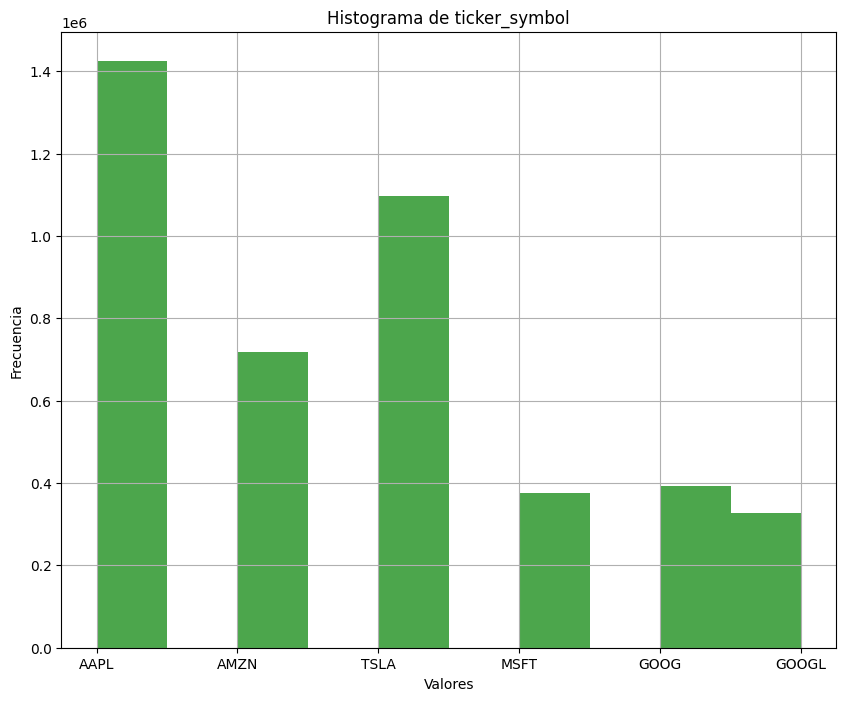

<Figure size 640x480 with 0 Axes>

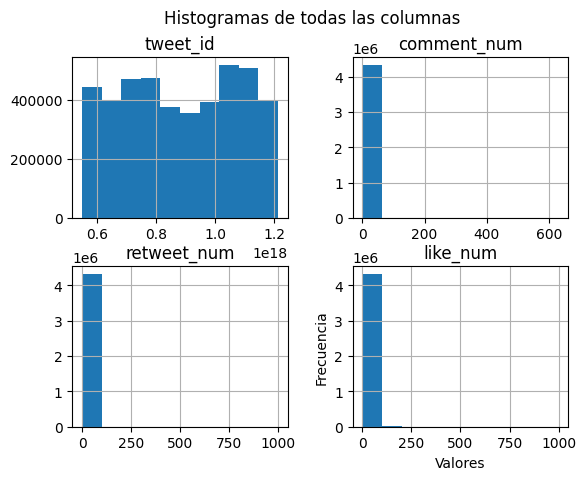

In [ ]:
# Generar histograma para 'ticker_symbol'
plt.figure(figsize=(10, 8))

df["ticker_symbol"].hist(color='green', alpha=0.7)
plt.title('Histograma de ticker_symbol')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

plt.figure()
df.hist()
plt.suptitle('Histogramas de todas las columnas')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()


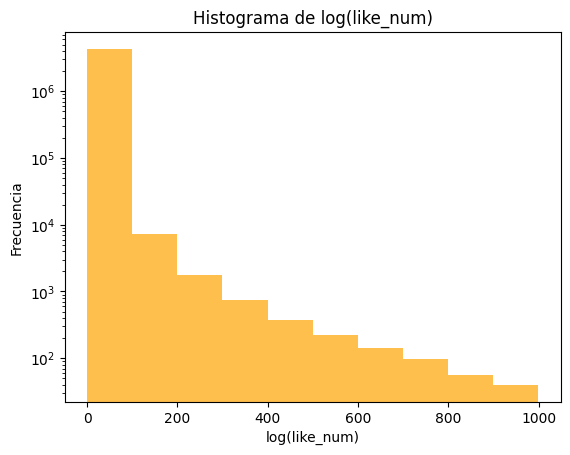

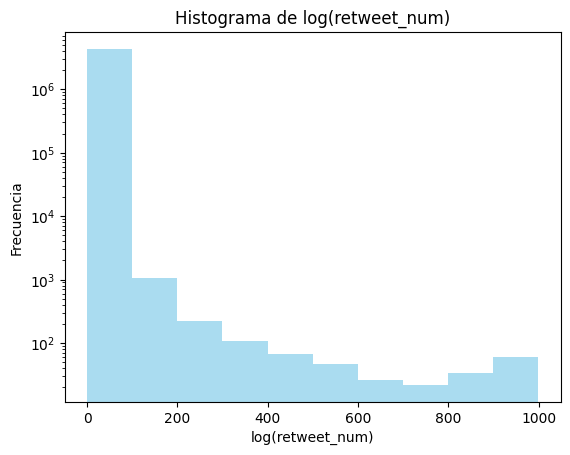

In [ ]:
plt.hist(df["like_num"],log=True, color='orange', alpha=0.7)
plt.title('Histograma de log(like_num)')
plt.xlabel('log(like_num)')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(df["retweet_num"],log=True, color='skyblue', alpha=0.7)
plt.title('Histograma de log(retweet_num)')
plt.xlabel('log(retweet_num)')
plt.ylabel('Frecuencia')
plt.show()


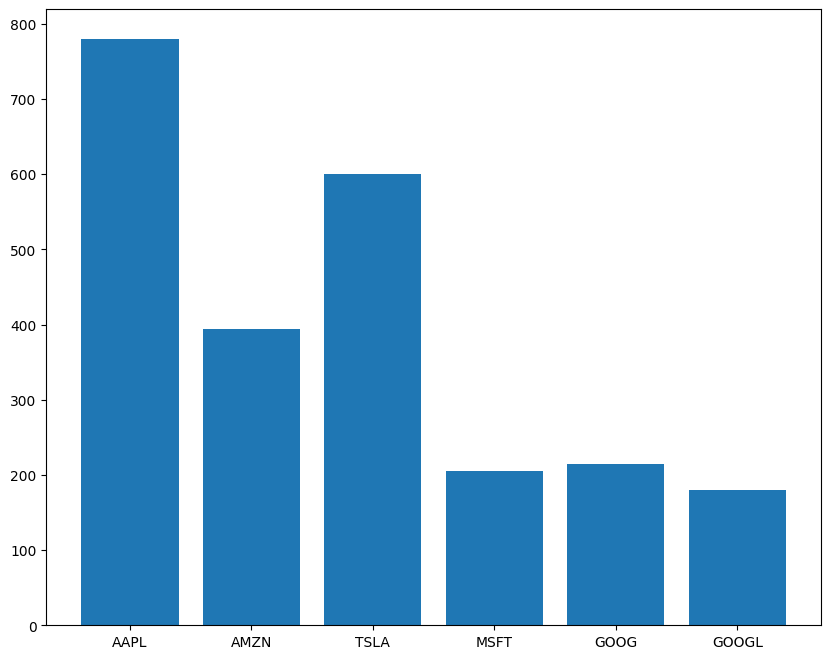

In [ ]:
#array of average tweets per day for each company
companies = df["ticker_symbol"].unique()
#how many entries per company
dict = {}
for company in companies:
    dict[company] = len(df[df["ticker_symbol"] == company])


days_count = len(df["post_date"].unique())

#average tweets per day
dict2 = {}
for company in companies:
    dict2[company] = dict[company]/days_count

#plot average tweets per day
plt.figure(figsize=(10,8))
plt.bar(range(len(dict2)), list(dict2.values()), align='center')
plt.xticks(range(len(dict2)), list(dict2.keys()))
plt.show()

AAPL


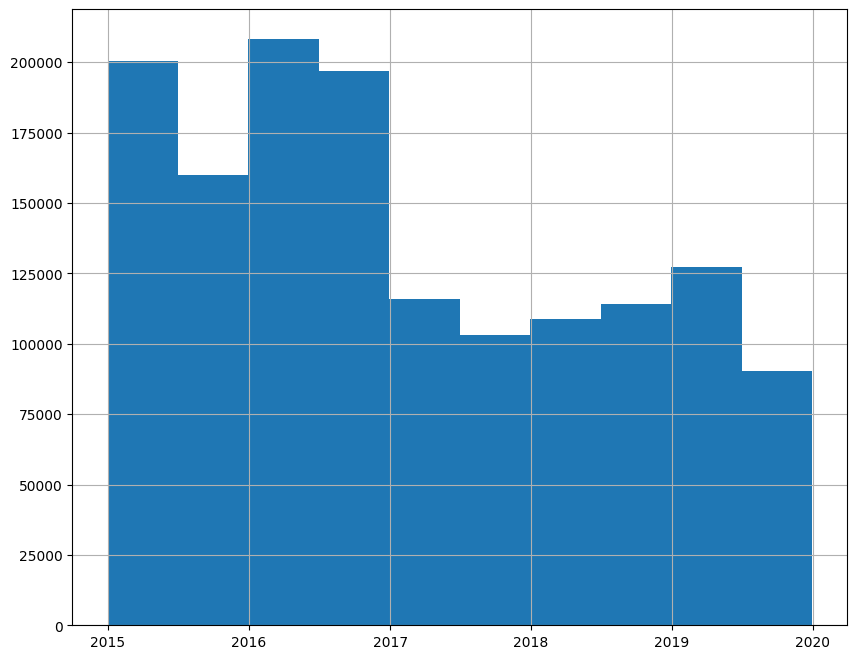

AMZN


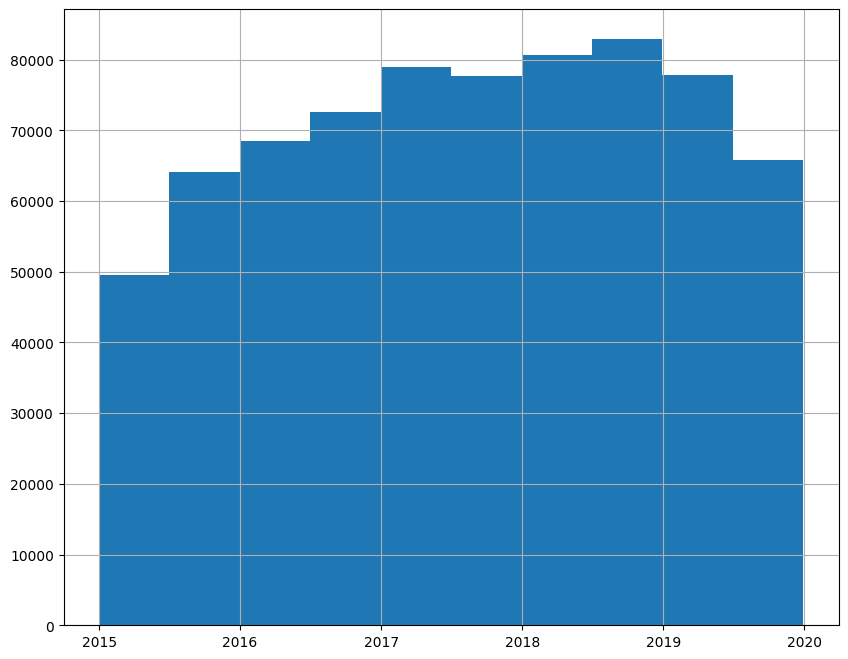

TSLA


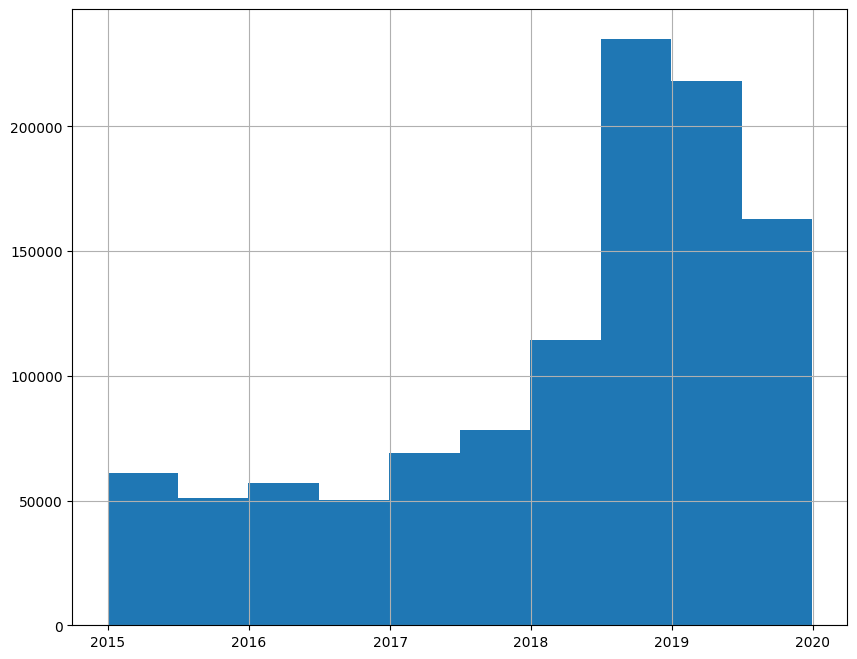

MSFT


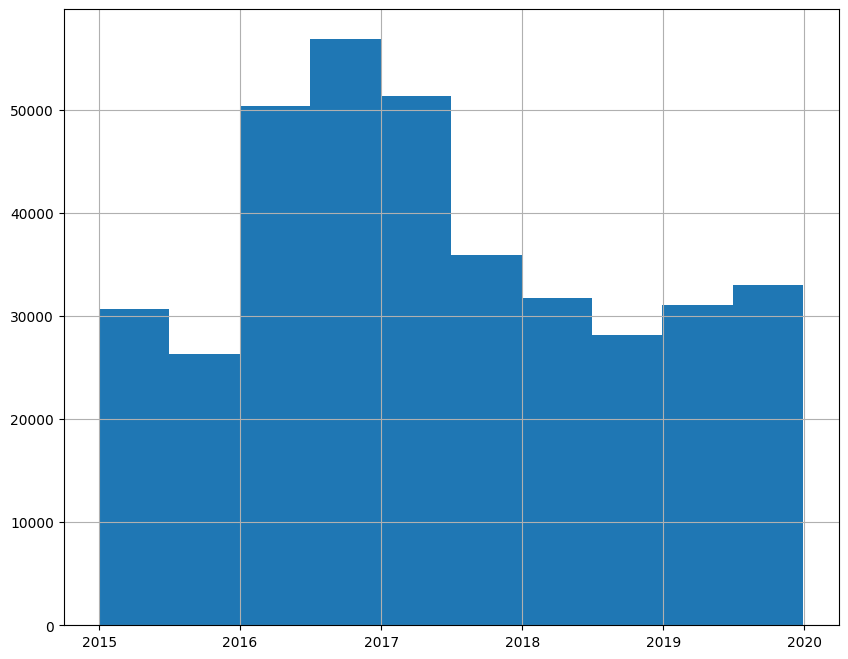

GOOG


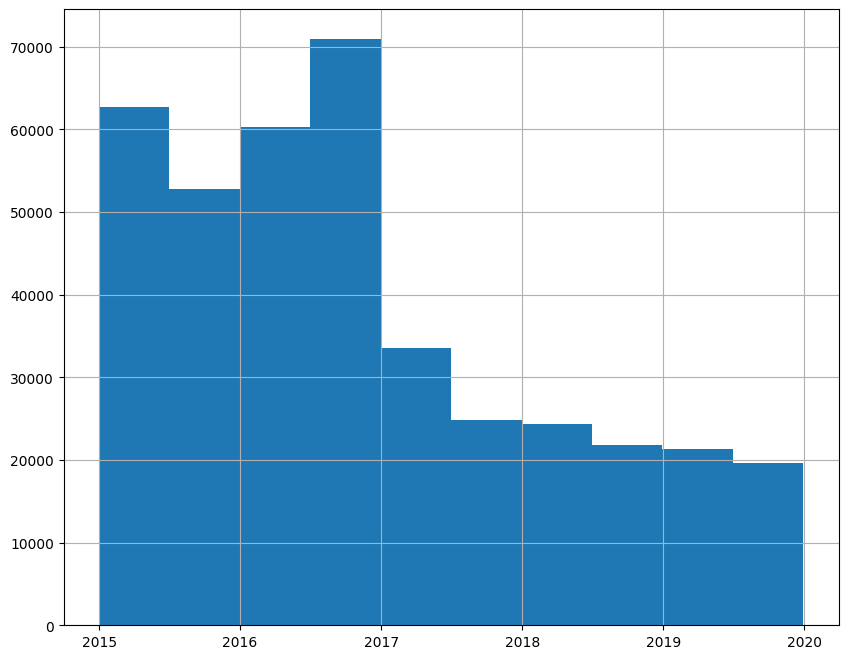

GOOGL


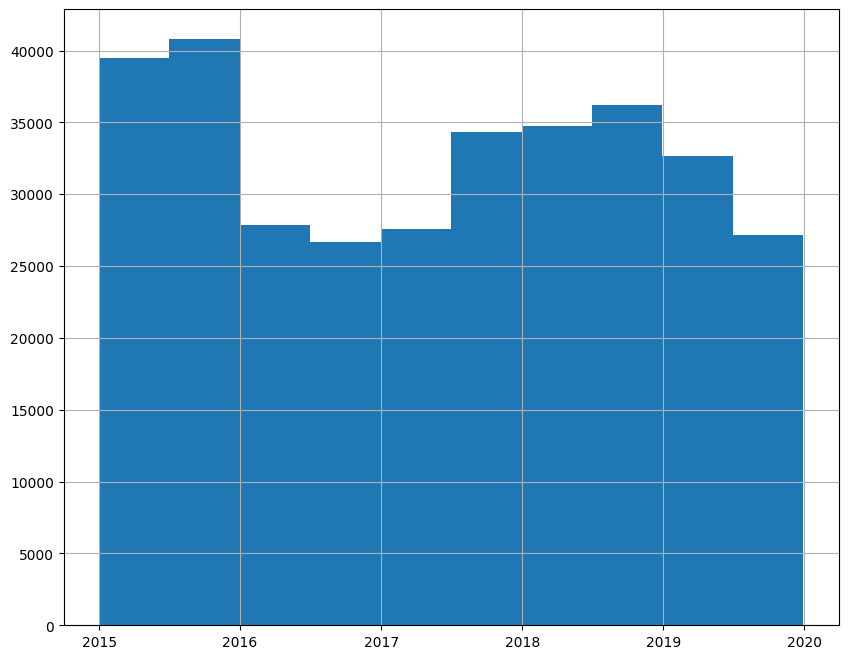

In [ ]:
#get different dataset for each company
dict3 = {}
for company in companies:
    dict3[company] = df[df["ticker_symbol"] == company]

#plot each company dataframe
for company in companies:
    print(company)
    dict3[company]['post_date'].hist(figsize=(10,8))
    plt.show()


In [ ]:
df.to_csv("/content/drive/MyDrive/Price_Prediction/CompanyTweets.csv", index=False)

In [ ]:
df.head()

,tweet_id,ticker_symbol,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,AAPL,2014-12-31,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,AAPL,2014-12-31,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,AMZN,2014-12-31,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,TSLA,2014-12-31,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,AAPL,2014-12-31,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [ ]:
#Union de los datos de las empresas
folder_path = '/content/drive/MyDrive/Price_Prediction/Stocks_data'

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
dfs = []
for csv_file in csv_files:
    df = pd.read_csv(os.path.join(folder_path, csv_file),parse_dates=['Date'])
    df['ticker_symbol'] = csv_file.rsplit('.', 1)[0]
    print(csv_file.rsplit('.', 1)[0], df.shape[0]/5)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
final_df=df[['Date','ticker_symbol','Open','High','Low','Close','Adj Close','Volume']]
df.head()

AAPL 251.6
AMZN 251.6
TSLA 251.6
GOOGL 251.6
GOOG 251.6
MSFT 251.6


,Date,Open,High,Low,Close,Adj Close,Volume,ticker_symbol
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498682,212818400,AAPL
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808516,257142000,AAPL
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810760,263188400,AAPL
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144634,160423600,AAPL
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072321,237458000,AAPL


In [ ]:
#Se elimina la caracteristica Adj_Close
df=final_df[['Date','ticker_symbol','Open','High','Low','Close','Volume']]
df.head(20)

,Date,ticker_symbol,Open,High,Low,Close,Volume
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,212818400
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,257142000
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,263188400
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,160423600
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,237458000
5,2015-01-09,AAPL,28.167500,28.312500,27.552500,28.002501,214798000
6,2015-01-12,AAPL,28.150000,28.157499,27.200001,27.312500,198603200
7,2015-01-13,AAPL,27.857500,28.200001,27.227501,27.555000,268367600
8,2015-01-14,AAPL,27.260000,27.622499,27.125000,27.450001,195826400
9,2015-01-15,AAPL,27.500000,27.514999,26.665001,26.705000,240056000


In [ ]:
df['Date'].dtype

dtype('<M8[ns]')

In [ ]:
df.size

52836

In [ ]:
df.head(30)

,Date,ticker_symbol,Open,High,Low,Close,Volume
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,212818400
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,257142000
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,263188400
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,160423600
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,237458000
5,2015-01-09,AAPL,28.167500,28.312500,27.552500,28.002501,214798000
6,2015-01-12,AAPL,28.150000,28.157499,27.200001,27.312500,198603200
7,2015-01-13,AAPL,27.857500,28.200001,27.227501,27.555000,268367600
8,2015-01-14,AAPL,27.260000,27.622499,27.125000,27.450001,195826400
9,2015-01-15,AAPL,27.500000,27.514999,26.665001,26.705000,240056000


In [ ]:
# Obtener una lista única de los nombres de las empresas
empresas = df['ticker_symbol'].unique()
empresas

array(['AAPL', 'AMZN', 'TSLA', 'GOOGL', 'GOOG', 'MSFT'], dtype=object)

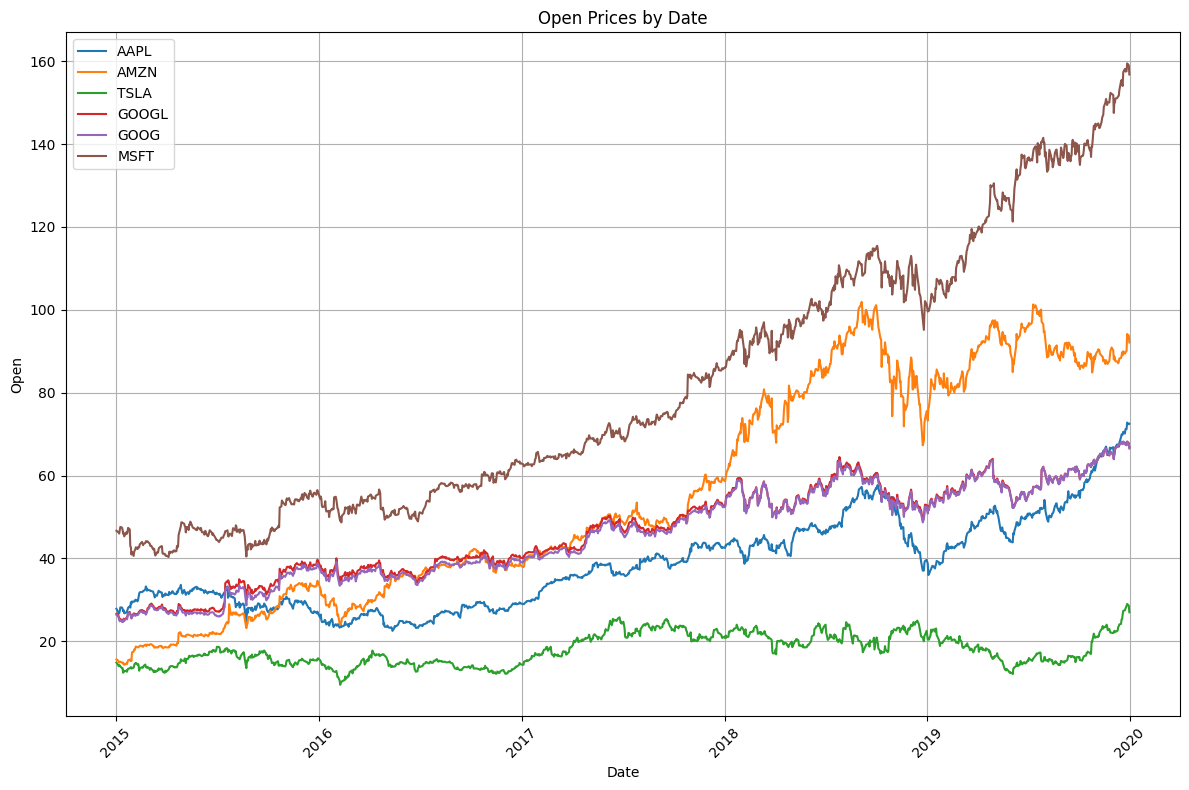

In [ ]:


# Crear el gráfico
plt.figure(figsize=(12, 8))

# Iterar sobre cada empresa y trazar la columna 'Open'
for empresa in empresas:
    datos_empresa = df[df['ticker_symbol'] == empresa]
    plt.plot(datos_empresa['Date'], datos_empresa['Open'], label=empresa)

# Agregar título y etiquetas a los ejes
plt.title('Open Prices by Date')
plt.xlabel('Date')
plt.ylabel('Open')
plt.legend()  # Mostrar leyenda con los nombres de las empresas
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para que quepa todo el contenido
plt.show()

In [ ]:
datos_empresa.size

22644

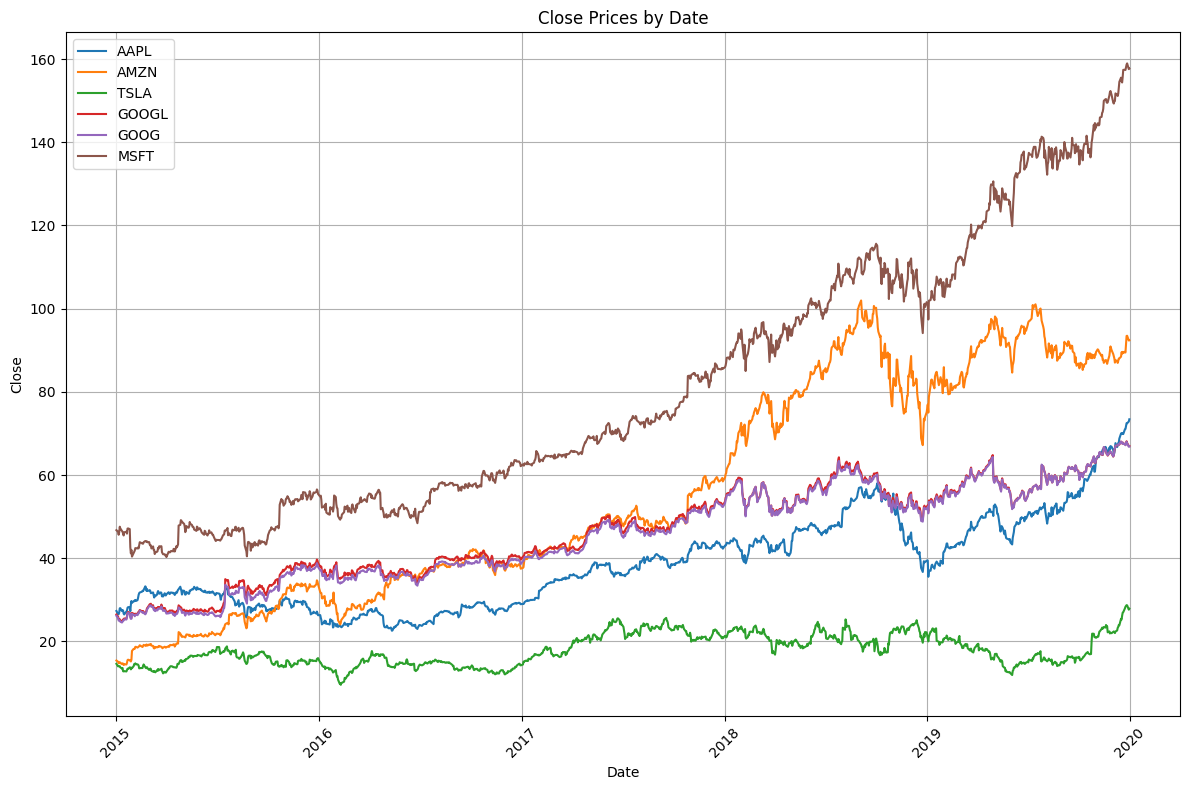

In [ ]:
# Crear el gráfico
plt.figure(figsize=(12, 8))

# Iterar sobre cada empresa y trazar la columna 'Open'
for empresa in empresas:
    datos_empresa = df[df['ticker_symbol'] == empresa]
    plt.plot(datos_empresa['Date'], datos_empresa['Close'], label=empresa)

# Agregar título y etiquetas a los ejes
plt.title('Close Prices by Date')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()  # Mostrar leyenda con los nombres de las empresas
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para que quepa todo el contenido
plt.show()

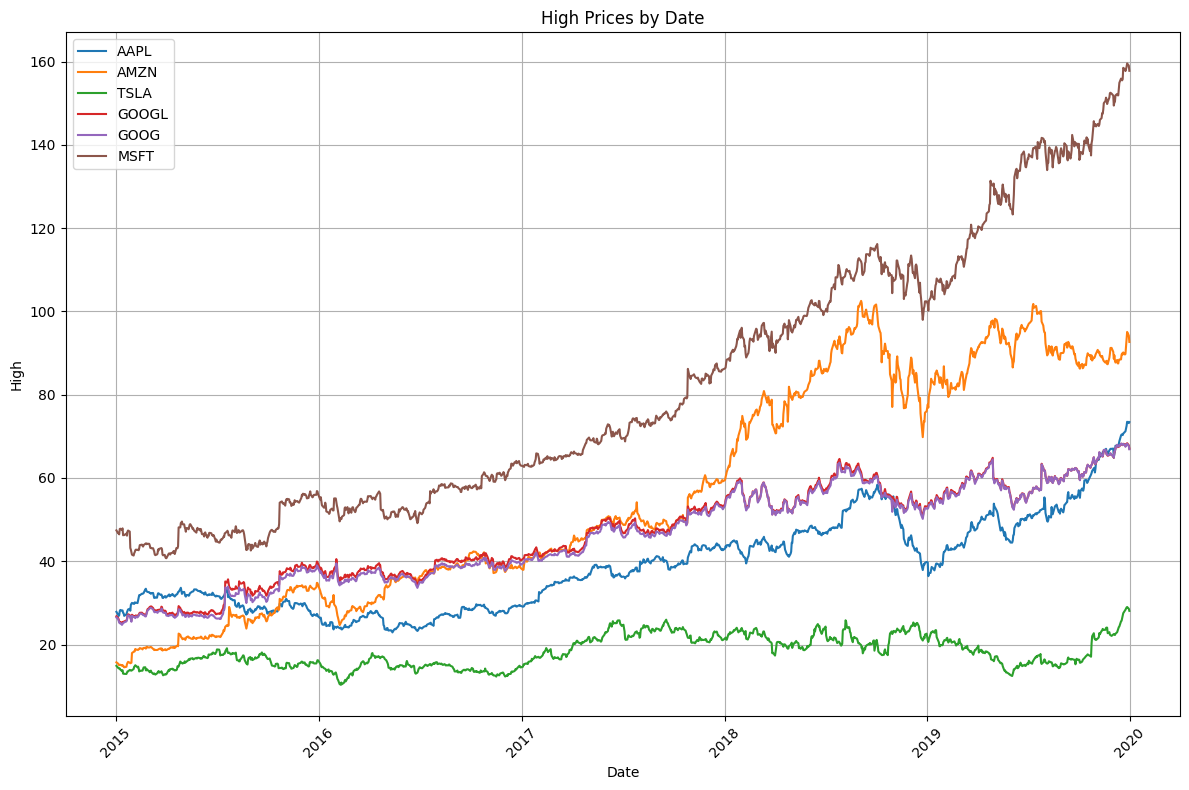

In [ ]:
# Obtener una lista única de los nombres de las empresas
empresas = df['ticker_symbol'].unique()

# Crear el gráfico
plt.figure(figsize=(12, 8))

# Iterar sobre cada empresa y trazar la columna 'Open'
for empresa in empresas:
    datos_empresa = df[df['ticker_symbol'] == empresa]
    plt.plot(datos_empresa['Date'], datos_empresa['High'], label=empresa)

# Agregar título y etiquetas a los ejes
plt.title('High Prices by Date')
plt.xlabel('Date')
plt.ylabel('High')
plt.legend()  # Mostrar leyenda con los nombres de las empresas
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para que quepa todo el contenido
plt.show()

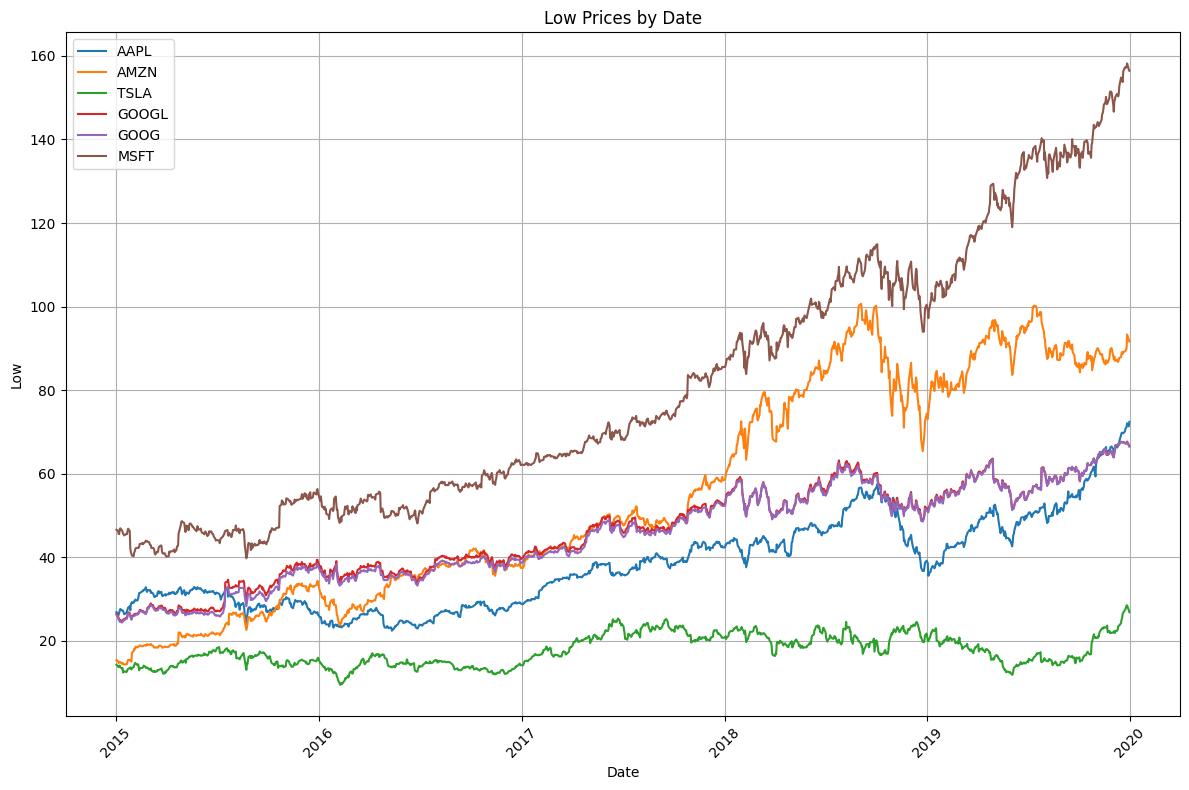

In [ ]:
# Obtener una lista única de los nombres de las empresas
empresas = df['ticker_symbol'].unique()

# Crear el gráfico
plt.figure(figsize=(12, 8))

# Iterar sobre cada empresa y trazar la columna 'Open'
for empresa in empresas:
    datos_empresa = df[df['ticker_symbol'] == empresa]
    plt.plot(datos_empresa['Date'], datos_empresa['Low'], label=empresa)

# Agregar título y etiquetas a los ejes
plt.title('Low Prices by Date')
plt.xlabel('Date')
plt.ylabel('Low')
plt.legend()  # Mostrar leyenda con los nombres de las empresas
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para que quepa todo el contenido
plt.show()

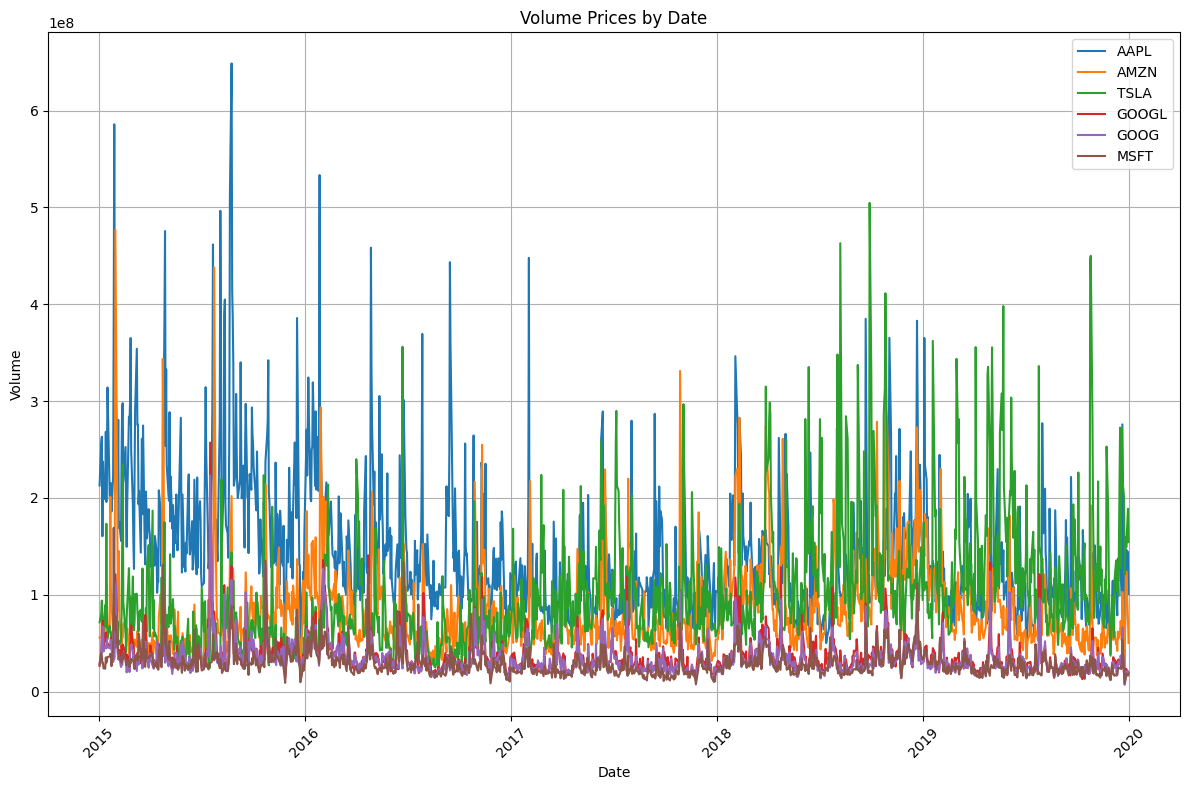

In [ ]:
# Obtener una lista única de los nombres de las empresas
empresas = df['ticker_symbol'].unique()

# Crear el gráfico
plt.figure(figsize=(12, 8))

# Iterar sobre cada empresa y trazar la columna 'Open'
for empresa in empresas:
    datos_empresa = df[df['ticker_symbol'] == empresa]
    plt.plot(datos_empresa['Date'], datos_empresa['Volume'], label=empresa)

# Agregar título y etiquetas a los ejes
plt.title('Volume Prices by Date')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()  # Mostrar leyenda con los nombres de las empresas
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para que quepa todo el contenido
plt.show()

In [ ]:
df.to_csv("/content/drive/MyDrive/Price_Prediction/StocksJoined.csv", index=False)

In [ ]:
#Datos Macroeconomicos
df=pd.read_csv('/content/drive/MyDrive/Price_Prediction/Indicators/macro_monthly.csv')
df.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.4
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.9
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.4
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.0
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.8


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
filtered_df = df[(df['DATE'] >= "2015-01-01") & (df['DATE'] <= "2020-01-01")].reset_index(drop=True)
filtered_df.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,2015-01-01,5.7,8.0,11759.100,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
1,2015-02-01,5.5,8.1,11818.575,13271.8,12083.1,107.42,1.975263,0.110714,1080165.0,102.2292,240.172
2,2015-03-01,5.4,7.7,11943.020,13233.7,12132.2,109.65,2.042727,0.112903,1095643.0,101.8945,240.755
3,2015-04-01,5.4,7.6,12020.125,13262.8,12170.3,109.04,1.935000,0.124667,1123360.0,101.2859,241.346
4,2015-05-01,5.6,7.5,11896.350,13284.7,12233.6,108.55,2.197500,0.123226,1145069.0,100.8408,241.688


<Figure size 640x480 with 0 Axes>

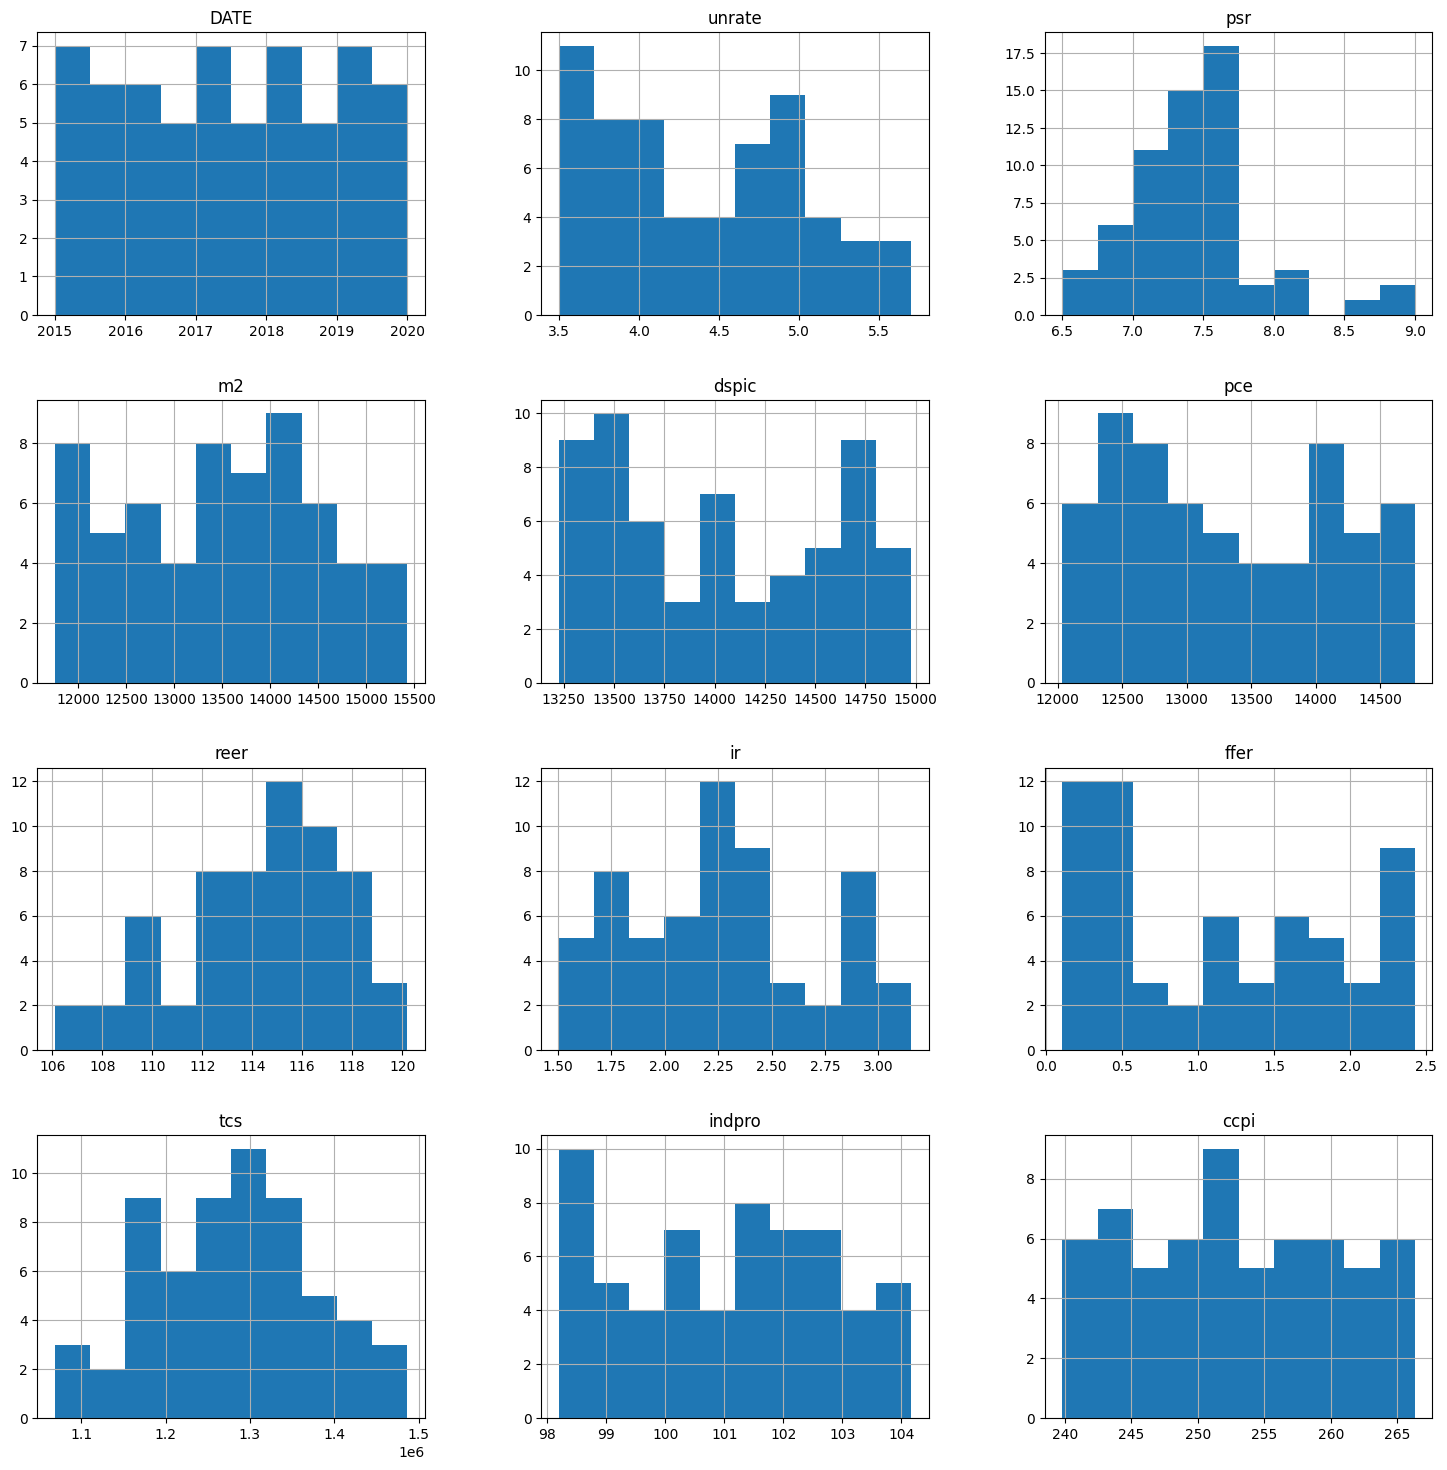

In [ ]:
plt.figure()
filtered_df.hist(figsize=(18,18))
plt.show()

**Unir datos de stocks con datos macroeconomicos**

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/Price_Prediction/StocksJoined.csv')
df2['Date'] = pd.to_datetime(df2['Date'])
df2.head()

,Date,ticker_symbol,Open,High,Low,Close,Volume
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,212818400
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,257142000
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,263188400
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,160423600
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,237458000


In [ ]:
filtered_df['period']=filtered_df['DATE'].dt.to_period('M')
df2['period']=df2['Date'].dt.to_period('M')
merged_df = df2.merge(filtered_df, on='period', how='inner')
df=merged_df[['Date', 'ticker_symbol', 'Open', 'High', 'Low','Close','Volume', 'unrate', 'psr', 'm2', 'dspic', 'pce', 'reer', 'ir', 'ffer', 'tcs', 'indpro', 'ccpi']]
df.head(25)

,Date,ticker_symbol,Open,High,Low,Close,Volume,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,212818400,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,257142000,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,263188400,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,160423600,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,237458000,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
5,2015-01-09,AAPL,28.167500,28.312500,27.552500,28.002501,214798000,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
6,2015-01-12,AAPL,28.150000,28.157499,27.200001,27.312500,198603200,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
7,2015-01-13,AAPL,27.857500,28.200001,27.227501,27.555000,268367600,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
8,2015-01-14,AAPL,27.260000,27.622499,27.125000,27.450001,195826400,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
9,2015-01-15,AAPL,27.500000,27.514999,26.665001,26.705000,240056000,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811


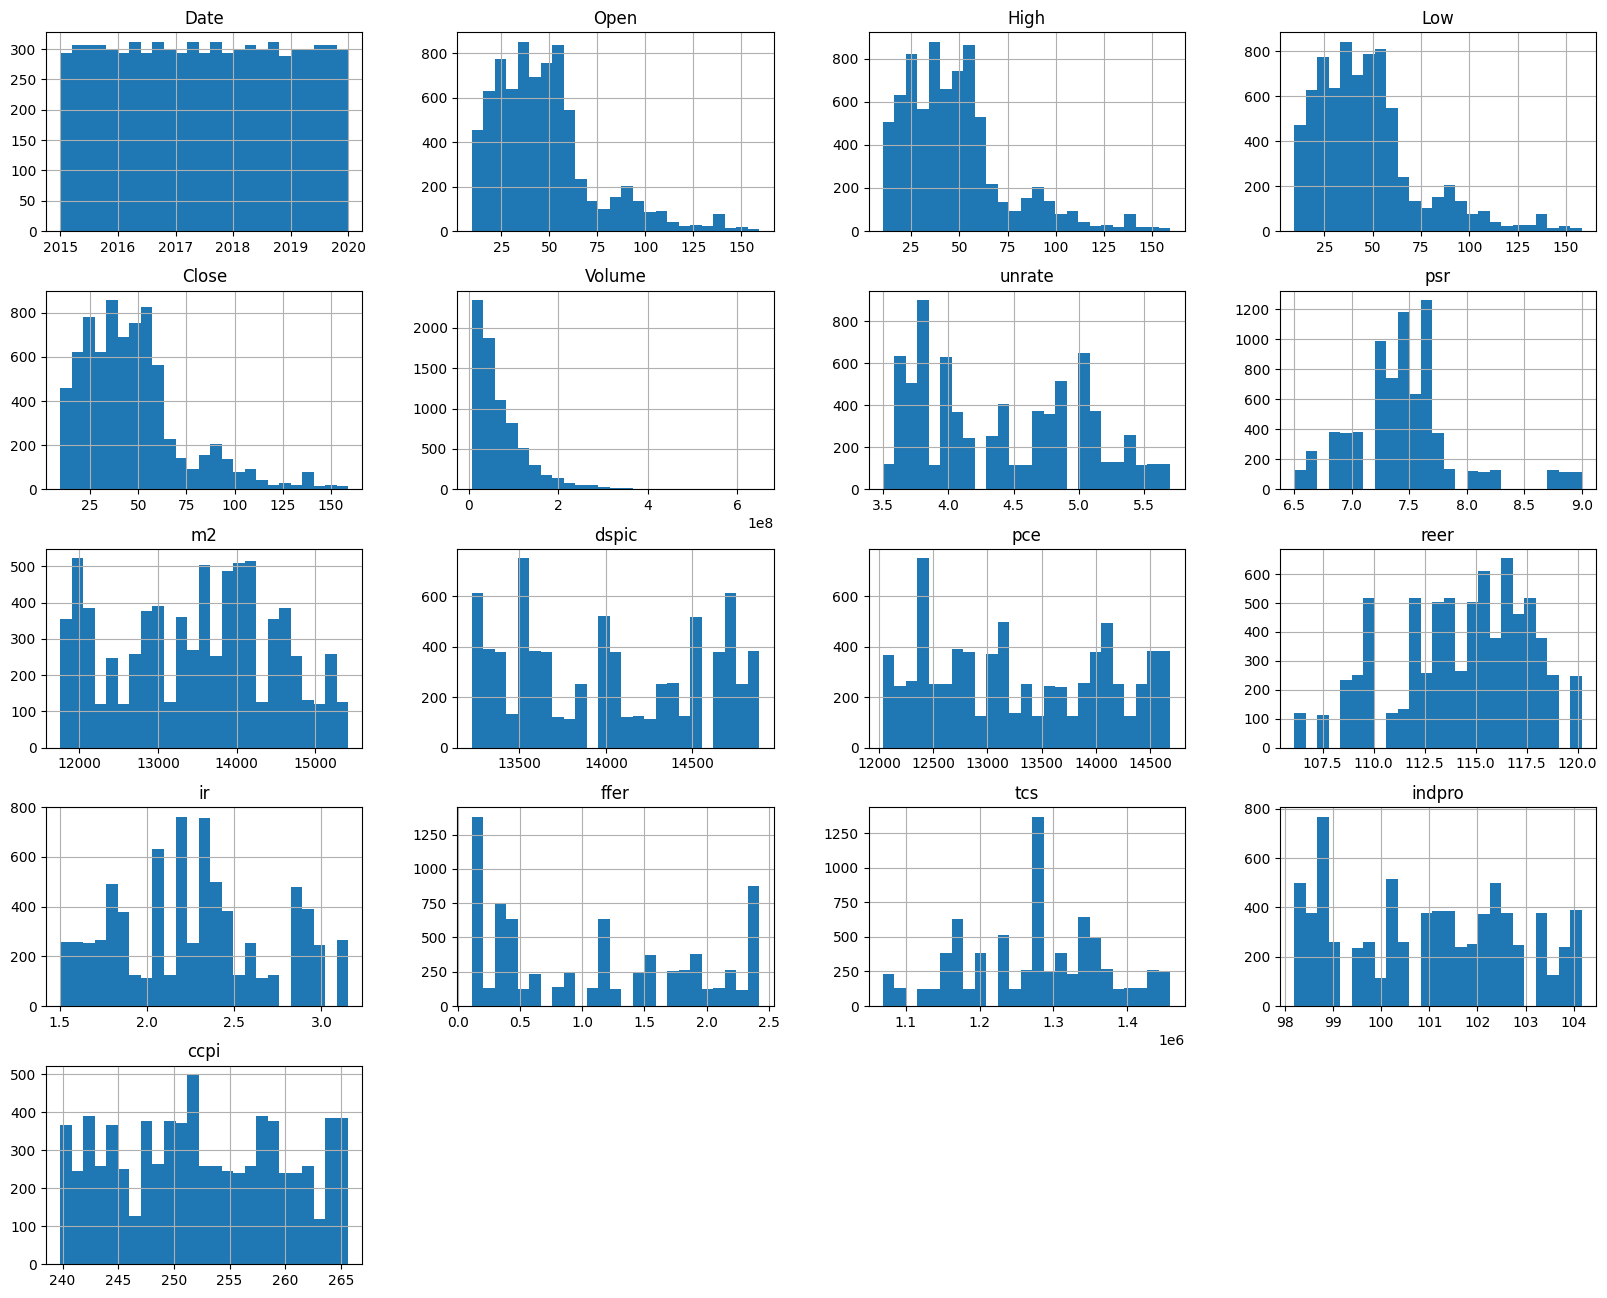

In [ ]:
df.hist(figsize=(20,16),bins=25)
plt.show()

In [ ]:
df.to_csv("/content/drive/MyDrive/Price_Prediction/Incomplete.csv", index=False)